In [1]:
library(GSVA)
library(GSEABase)
library(msigdbr)
library(org.Hs.eg.db)
library(enrichplot)
library(limma)

Warning message:
“multiple methods tables found for ‘which’”
Warning message:
“multiple methods tables found for ‘which’”
Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which

In [2]:
library(clusterProfiler)

clusterProfiler v3.16.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [3]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ stringr::boundary() masks graph::boundary()
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks clusterProfiler::filter(), stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGener

In [4]:
msigdbr_species()

species_name,species_common_name
<chr>,<chr>
Anolis carolinensis,"Carolina anole, green anole"
Bos taurus,"bovine, cattle, cow, dairy cow, domestic cattle, domestic cow"
Caenorhabditis elegans,roundworm
Canis lupus familiaris,"dog, dogs"
Danio rerio,"leopard danio, zebra danio, zebra fish, zebrafish"
Drosophila melanogaster,fruit fly
Equus caballus,"domestic horse, equine, horse"
Felis catus,"cat, cats, domestic cat"
Gallus gallus,"bantam, chicken, chickens, Gallus domesticus"


In [5]:
ALAL<-read.csv('0914.cluster0.ALAL.csv')

In [6]:
ALAL<-ALAL[which(ALAL$p_val<0.05),]

In [7]:
ALAL$avg_log2FC<-(-ALAL$avg_log2FC)

In [8]:
ge = ALAL$avg_log2FC
names(ge) = ALAL$X
ge = sort(ge,decreasing=T)
head(ge)

JCHAIN        CCND1         FRZB RP5-887A10.1        DUSP1    LINC01480 
    7.709755     3.074361     2.628724     2.445869     1.276934     1.248178

In [9]:
geneset<-read.csv('venetoclax-MM-diff.csv')

In [10]:
genesetup<-geneset[which(geneset$logFC>0),]
genesetdw<-geneset[which(geneset$logFC<0),]

In [11]:
intersect(geneset$symbol,ALAL$X)

[1] "MS4A1"    "CD79A"    "MOCOS"    "VPREB3"   "MCL1"     "SEC14L1" 
 [7] "PTP4A3"   "TRPM4"    "CPNE5"    "PPIC"     "KIAA0125"

In [12]:
GO_df<-data.frame('Ven_sensitive_cell_lines_up',genesetup$symbol)
colnames(GO_df)<-c('gs_exact_source','gene_symbol')
GO_df<-as_tibble(GO_df)

In [13]:
em <-GSEA(ge, TERM2GENE = GO_df,minGSSize = 1, pvalueCutoff = 0.99, verbose = F)

[1] "CD79A/MS4A1/VPREB3"

[1] 0.1515152

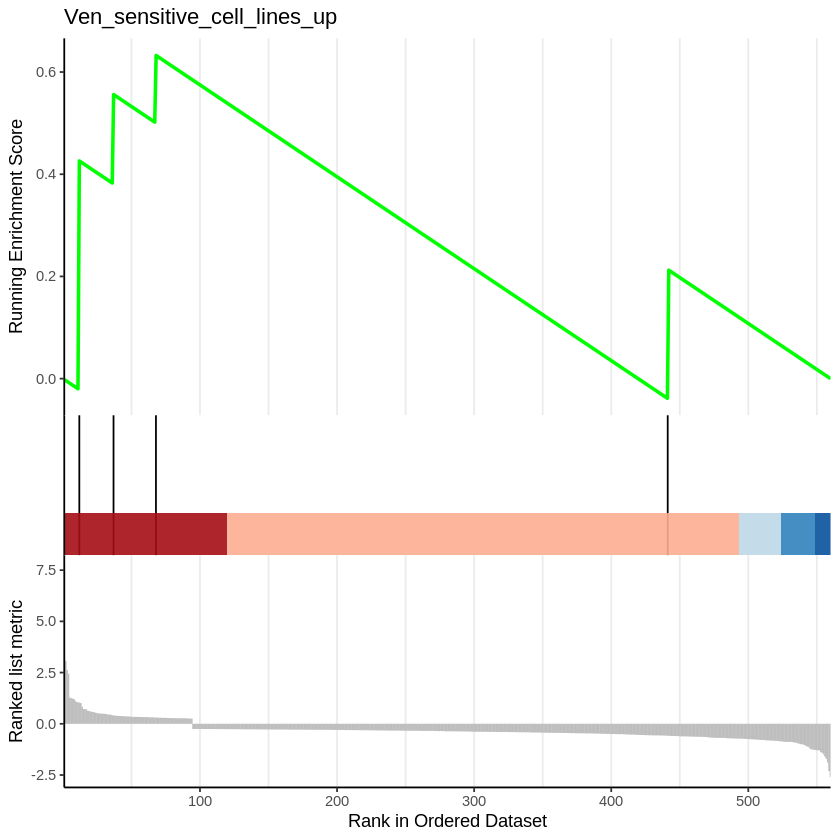

In [14]:
gseaplot2(em, geneSetID = 1, title = em$Description[1])
em$core_enrichment
em$pvalue

In [15]:
ggsave('vensensitive.pdf',width=6,height=6)
dev.off()

null device 
          1

In [16]:
em

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:560] 7.71 3.07 2.63 2.45 1.28 ...
 - attr(*, "names")= chr [1:560] "JCHAIN" "CCND1" "FRZB" "RP5-887A10.1" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.99 
#...1 enriched terms found
'data.frame':	1 obs. of  11 variables:
 $ ID             : chr "Ven_sensitive_cell_lines_up"
 $ Description    : chr "Ven_sensitive_cell_lines_up"
 $ setSize        : int 4
 $ enrichmentScore: num 0.632
 $ NES            : num 1.4
 $ pvalue         : num 0.152
 $ p.adjust       : num 0.152
 $ qvalues        : logi NA
 $ rank           : int 68
 $ leading_edge   : chr "tags=75%, list=12%, signal=66%"
 $ core_enrichment: chr "CD79A/MS4A1/VPREB3"
#...Citation
  Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
  clusterProfiler: an R package for comparing biological themes among
  gene clusters. OMICS: A Journal of Integrative Biology
  2012, 16(5):284-287 


In [17]:
GO_df<-data.frame('Ven_sensitive_cell_lines_down',genesetdw$symbol)
colnames(GO_df)<-c('gs_exact_source','gene_symbol')
GO_df<-as_tibble(GO_df)

In [18]:
em2 <-GSEA(ge, TERM2GENE = GO_df,minGSSize = 1, pvalueCutoff = 0.99, verbose = F)

[1] "PPIC/TRPM4/SEC14L1/CPNE5/KIAA0125/PTP4A3"

[1] 0.03720238

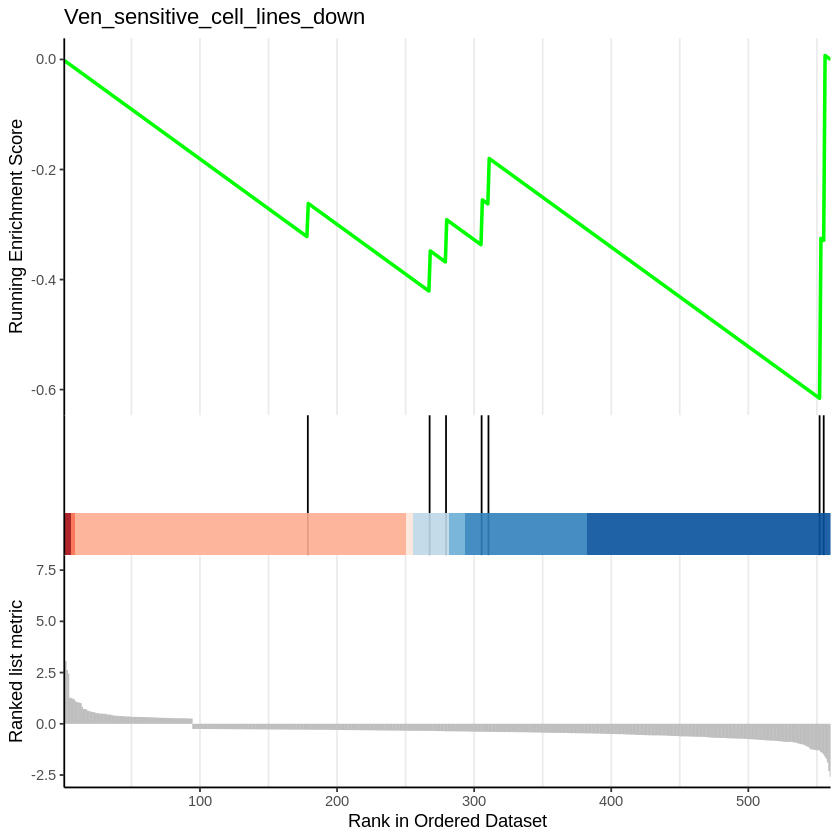

In [19]:
gseaplot2(em2, geneSetID = 1, title = em2$Description[1])
em2$core_enrichment
em2$pvalue

In [20]:
ggsave('venresist.pdf',width=6,height=6)
dev.off()

null device 
          1

In [21]:
em2

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:560] 7.71 3.07 2.63 2.45 1.28 ...
 - attr(*, "names")= chr [1:560] "JCHAIN" "CCND1" "FRZB" "RP5-887A10.1" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.99 
#...1 enriched terms found
'data.frame':	1 obs. of  11 variables:
 $ ID             : chr "Ven_sensitive_cell_lines_down"
 $ Description    : chr "Ven_sensitive_cell_lines_down"
 $ setSize        : int 7
 $ enrichmentScore: num -0.616
 $ NES            : num -1.58
 $ pvalue         : num 0.0372
 $ p.adjust       : num 0.0372
 $ qvalues        : logi NA
 $ rank           : num 9
 $ leading_edge   : chr "tags=86%, list=2%, signal=85%"
 $ core_enrichment: chr "PPIC/TRPM4/SEC14L1/CPNE5/KIAA0125/PTP4A3"
#...Citation
  Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
  clusterProfiler: an R package for comparing biological themes among
  gene clusters. OMICS: A Journal of Integrative Biology
  2012, 16(5):